#PyTorch Intro - Tensory - Laboratorium

**Tensor** w bibliotece PyTorch jest specjalizowaną strukturą danych podobną do wielowymiarowej tablicy `ndarray` w bibliotece numpy. Na tensorach można wykonywać typowe operacje algebry liniowej oraz operacje specyficzne dla głębokiego uczenia jak na przykład automatyczne różniczkowanie (autograd).
Tensory wykorzystujemy do przechowywania przetwarzanych danych oraz parametrów (wag) modeli. Biblioteka PyTorch pozwala na efektywne przetwarzanie tensorów na CPU lub GPU.

##Przygotowanie środowiska
Upewnij się, że notatnik jest uruchomiony na maszynie z GPU. Jeśli GPU nie jest dostępne zmień typ maszyny (Runtime | Change runtime type) i wybierz T4 GPU.

In [1]:
!nvidia-smi

Thu Mar 13 10:35:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8              6W /   65W |     106MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Biblioteka PyTorch (`torch`) jest domyślnie zainstalowana w środowisku COLAB.

In [2]:
import torch
import numpy as np

print(f"Wersja biblioteki PyTorch: {torch.__version__}")

Wersja biblioteki PyTorch: 2.6.0+cu126


Sprawdzenie dostępnego urządzenia GPU.

In [3]:
print(f"Dostępność GPU: {torch.cuda.is_available()}")
print(f"Typ GPU: {torch.cuda.get_device_name(0)}")

Dostępność GPU: True
Typ GPU: NVIDIA GeForce RTX 4060 Laptop GPU


##Zadania do wykonania

###Zadanie 1: Tworzenie tensorów
Wygeneruj tensor o pokazanej poniżej zawartości nie używając pętli. Wskazówka: Wykorzystaj funkcję `torch.full` i mechanizm indeksowania tensorów.

```
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
```



## Rozwiązanie
Pierwotny plan - tworzę tensor wypełniony jedynkami a następnie próbują za pomocą mądrego indeksowania zmienić niektóre wartości na `2` i `3`

In [27]:
tensor = torch.full(size=(14, 13), fill_value=1)
print(tensor)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


Próbuję nadpisać niektóre wartości tensora dwójkami - widzę, że dwójki są ustawione w rzędach i kolumnach.

In [28]:
tensor[[2,7,12]] = 2
tensor[:,[1, 6, 11]] = 2
print(tensor)

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])


Widzę, że trójki są w skupiskach 2x2. Spróbuję zrobić to jedną linijką, ale nie wiem czy indeksowanie zadziała w prawidłowy sposób

In [29]:
tensor[[4,5,9,10], [3,4,8,9]] = 3
print(tensor)

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])


Mogłem spodziewać się tego wyniku - trójki zostały ustawione tylko na indeksach `4,3`, `5,4`, `9,8` i `10,9` czyli zamiast 16 wartości zmieniłem tylko 4. Może stworzenie dwówymiarowej tablicy indeksów da pożądany efekt?

In [30]:
x_idxs = np.array([4,5,9,10])
#Rozszerzanie tablicy za pomocą broadcastingu
extended = x_idxs + np.zeros(shape=(4,1))
print(extended)

[[ 4.  5.  9. 10.]
 [ 4.  5.  9. 10.]
 [ 4.  5.  9. 10.]
 [ 4.  5.  9. 10.]]


Teraz w teorii powinienem dostać się do 16 wartości - zresetowałem tensor, tak żeby nie mieć tego wcześniejszego błędu w wyniku

In [31]:
tensor[extended, [3,4,8,9]] = 3
print(tensor)

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])


Ciekawe. Spodziewałem się, że do każdego wiersza w `extended` będzie dobrana jedna wartość z `[3,4,8,9]`. Może powinienem dopasować wymiary i zmienić kształt indeksów kolumn z `1,4` na `4,1`

In [32]:
tensor[extended, [[3], [4], [8], [9]]] = 3
print(tensor)

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])


Wygląda na to że zadziałało. Wynikowy tensor powinien być taki sam jak ten z polecenia jeżeli czegoś nie przegapiłem.

###Zadanie 2: Wartości własne macierzy
Utwórz dwuwymiarowy tensor $M$ o rozmiarach $20 \times 20$ zainicjalizowany losowymi wartościami o standardowym rozkładzie normalnym.
Następnie wyznacz wartości własne macierzy $
X = M D M^{-1} \, ,
$
gdzie
$$
\begin{align}
D =
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 & 0 \\
0 & 2 & 0 & \ldots  & 0 & 0 \\
\vdots &  & \ddots &  &  & \vdots \\
\vdots &  &  &  & 19 & 0 \\
0 & \ldots & \ldots & \ldots & 0 & 20
\end{bmatrix}
\end{align} \, .
$$
Nie używaj pętli. Macierz $D$ wygeneruj korzystając z funkcji `torch.diag`. Do wyznaczenia wektorów własnych wykorzystaj funkcję `torch.linalg.eig`.

## Rozwiązanie
Najpierw zacznę od stworzenia macierzy M i D

In [47]:
M = torch.randn(size=(20,20))
print(M[0:10, 0:10])
D = torch.diag(torch.arange(start=1, end=21))
print(D)

tensor([[ 0.3622,  1.3220, -0.3373, -0.3295, -0.7940,  0.8075, -0.6365, -0.6488,
          0.2776, -1.8464],
        [ 1.1812, -1.8071,  0.5576,  1.7034, -0.8148,  0.0137,  0.2319, -0.4721,
         -0.0218,  0.2672],
        [ 0.1543,  0.2874,  1.2320,  1.4248, -0.0948, -1.2638, -0.4314, -0.5732,
         -0.9995, -0.2615],
        [-0.4783, -0.6303,  0.2038,  2.1286,  0.8438, -0.3402,  0.1788, -0.6253,
         -0.6403,  1.6122],
        [ 0.0566,  0.2430, -0.4890,  0.6393,  0.8052, -0.1554, -0.1586,  0.5825,
          0.8343,  0.6650],
        [ 0.5589,  0.6100, -0.9138, -3.5754, -0.9860, -0.1899, -0.8470, -0.2224,
         -0.9450,  0.6182],
        [ 0.3563,  0.4073, -1.1321, -1.5469, -1.6478,  0.2731, -0.7070, -0.4826,
          1.8486, -0.7246],
        [ 0.9333, -0.4724,  1.6133,  0.2394,  0.8248,  1.6078,  1.6243, -0.8543,
         -2.0419, -0.4755],
        [-0.6421,  0.6592,  0.3982, -1.8796, -0.7310, -1.2196,  2.4531, -0.8806,
         -1.1893,  0.0592],
        [-2.1113,  

Wygląda dobrze. Teraz obliczam macierz X

In [48]:
X = M@D@M.T
print(X)

RuntimeError: expected m1 and m2 to have the same dtype, but got: float != __int64

Dobra po pierwsze M.T to nie to samo co $ M^{-1} \, $. Dodatkowo pomieszałem typy danych

In [52]:
import torch.linalg as linalg

In [53]:
D = torch.diag(torch.arange(start=1, end=21, dtype=torch.float32))
X = M@D@linalg.inv(M)
print(X)

tensor([[ 3.2656e+01,  2.5296e+01,  2.4975e+01,  3.1948e+01,  1.0223e+01,
          1.4562e+01, -3.8478e+01, -2.8183e+01, -2.4257e+00, -1.9183e+01,
          8.0992e+01, -2.9912e+01,  4.2945e+01,  3.9931e+01, -9.9165e+01,
          3.5421e+01,  2.3582e+00, -2.3755e+01,  7.7168e+01,  6.0243e+00],
        [ 3.8182e+01,  4.7068e+01,  4.6671e+01,  5.6520e+01,  4.0229e+01,
          3.2619e+01, -4.7671e+01, -3.3406e+01,  7.5062e+00, -1.8972e+01,
          1.1822e+02, -4.7246e+01,  6.1036e+01,  5.4076e+01, -1.4382e+02,
          4.9616e+01,  5.4649e+00, -3.5512e+01,  9.7858e+01, -5.8856e+00],
        [ 3.7800e+00,  7.4890e+00,  1.8674e+01,  5.5534e+00,  5.6564e+00,
          7.6990e+00, -9.3838e+00, -4.4337e+00, -2.3637e+00, -3.6009e+00,
          1.8162e+01, -8.8009e+00,  7.5172e+00,  8.6329e+00, -2.6172e+01,
          5.9900e+00, -6.7623e-01, -6.0401e+00,  1.7490e+01, -9.9663e-01],
        [ 4.7522e+01,  4.2333e+01,  6.2359e+01,  7.6787e+01,  4.6565e+01,
          4.2053e+01, -6.3434e+01, 

Obliczam wektory własne

In [55]:
L, V = linalg.eig(X)
print(L)

tensor([ 0.9998+0.j,  1.9999+0.j,  2.9995+0.j, 19.9999+0.j, 19.0000+0.j,  4.0008+0.j,
        17.9999+0.j, 17.0000+0.j,  5.0000+0.j,  6.0000+0.j,  7.0003+0.j, 15.9996+0.j,
         8.0002+0.j,  9.0000+0.j, 10.0005+0.j, 14.9989+0.j, 11.0000+0.j, 14.0000+0.j,
        12.0007+0.j, 13.0001+0.j])


In [56]:
print(V)

tensor([[ 0.0697+0.j,  0.3383+0.j,  0.0794+0.j,  0.0648+0.j, -0.0176+0.j,  0.0472+0.j,
         -0.0953+0.j, -0.4402+0.j,  0.2047+0.j,  0.2251+0.j, -0.1283+0.j, -0.1442+0.j,
         -0.1784+0.j, -0.0572+0.j, -0.3926+0.j, -0.0612+0.j,  0.0281+0.j,  0.6295+0.j,
          0.0856+0.j, -0.1025+0.j],
        [ 0.2275+0.j, -0.4624+0.j, -0.1309+0.j,  0.1890+0.j, -0.4126+0.j, -0.2433+0.j,
         -0.2601+0.j, -0.2722+0.j,  0.2100+0.j,  0.0038+0.j,  0.0468+0.j,  0.1008+0.j,
         -0.1297+0.j,  0.0045+0.j,  0.0568+0.j, -0.3149+0.j,  0.3756+0.j, -0.1558+0.j,
          0.1024+0.j, -0.1404+0.j],
        [ 0.0297+0.j,  0.0735+0.j, -0.2898+0.j,  0.0875+0.j, -0.2295+0.j, -0.2035+0.j,
         -0.3409+0.j,  0.3571+0.j,  0.0244+0.j, -0.3523+0.j, -0.0870+0.j,  0.0266+0.j,
         -0.1575+0.j,  0.2058+0.j, -0.0556+0.j, -0.2239+0.j, -0.1146+0.j,  0.0598+0.j,
          0.1804+0.j,  0.4227+0.j],
        [-0.0922+0.j, -0.1613+0.j, -0.0477+0.j, -0.2728+0.j, -0.0146+0.j, -0.3043+0.j,
          0.0646+0.j, 

###Zadanie 3: Porównanie czasów wykonywania operacji na CPU i GPU
Napisz kod który wyświetli wykres liniowy przedstawiający zależność czasu mnożenia dwóch macierzy kwadratowych $n \times n$ od ich rozmiaru $n$ dla działań wykonanych na CPU i na GPU.
Mierząc czas wykonania operacji na GPU pamiętaj aby przed rozpocząciem i przed zakończeniem pomiaru czasu wywołać polecenie `torch.cuda.synchronize()` które czeka na zakończenie obliczeń na GPU.


```
torch.cuda.synchronize()
start_time = time.time()
...
...
torch.cuda.synchronize()
end_time = time.time()
```



Może uda zrobić się wszystko w jednej pętli a potem wystarczy tylko wyświetlić wykresy

In [3]:
import time

In [16]:
gpu_times = []
cpu_times = []
N = 3000
for n in range(1, N):
    gpu_matrix = torch.rand(size=(n,n), device='cuda')
    cpu_matrix = torch.rand(size=(n,n), device='cpu')

    torch.cuda.synchronize()
    start_time = time.time()
    gpu_matrix@gpu_matrix
    end_time = time.time()
    torch.cuda.synchronize()
    gpu_times.append(end_time-start_time)

    start_time = time.time()
    cpu_matrix@cpu_matrix
    end_time = time.time()
    cpu_times.append(end_time-start_time)

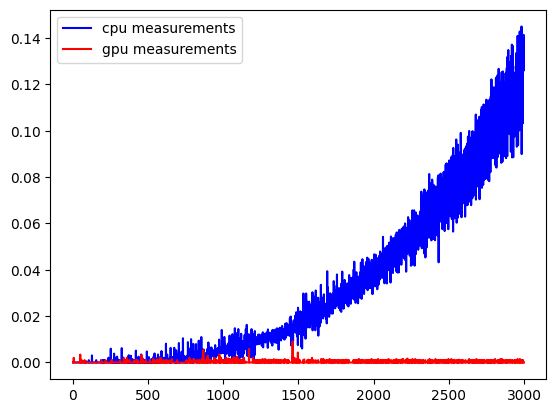

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1, N), cpu_times, label="cpu measurements", color='b')
plt.plot(range(1, N), gpu_times, label="gpu measurements", color='r')
plt.legend()
plt.show()

###Zadanie 4 (opcjonalne): Konwencja sumacyjna Einsteina
Zapisz podane operacje korzystając z konwencji sumacyjnej Einsteina.

Wyznacz ślad (suma elementów na przekątnej) macierzy `M`.

In [4]:
M = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

Powinno dać się to zrobić iloczynem skalarnym z macierzą diagonalną

In [34]:
diagonal = torch.diag(torch.from_numpy(np.ones(shape=3))).long()

In [38]:
sum = torch.einsum('ij,ij->', M, diagonal)
print(f'{sum=}')

sum=tensor(15)


In [ ]:
#Oczekiwany wynik: 15

Wyznacz wartość formy biliniowej
$z = \mathbf{x}^T \mathbf{A} \mathbf{y}$

In [39]:
x = torch.tensor([1, 2])
A = torch.tensor([[3, 4], [5, 6]])
y = torch.tensor([7, 8])

In [50]:
result = torch.einsum('i,ij,j->', x.t(), A, y)
print(f'{result=}')

result=tensor(219)


In [ ]:
#Oczekiwany wynik 219

Wyznacz ważoną sumę wektorów wierszowych macierzy `V` z wagami w wektorze `w`.
$$\mathbf{z}_j = \sum_i \mathbf{w}_i \mathbf{V}_{ij}$$




In [51]:
w = torch.tensor([0.2, 0.3, 0.5])
V = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)  # Shape: [3, 2]

In [52]:
torch.einsum('i,ij->j', w, V)

tensor([3.6000, 4.6000])

In [ ]:
#Oczekiwany wynik [3.6000, 4.6000]

Dla trójwymiarowej macierzy `A` wyznacz sumę elementów po drugiej i trzeciej współrzędnej:
$$\mathbf{z}_i = \sum_{j,k} \mathbf{A}_{ijk}$$

In [55]:
A = torch.tensor(
    [[[1, 2], [3, 4], [5, 6]],
     [[2, 5], [1, 7], [1, 3]]]
    )
print(A.shape)

torch.Size([2, 3, 2])


In [56]:
torch.einsum('ijk,ijk->i', A, torch.ones_like(A))

tensor([21, 19])

In [ ]:
#Oczekiwany wynik: [21, 19]